# 📊 Evaluating the Impact of a New Feature on User Retention in a Mobile Game

## **📍 Scenario**
A mobile game company introduced a new feature aimed at increasing player retention. To test its impact, an **A/B test** was conducted:
- **Control Group (gate_30)**: No new feature.
- **Test Group (gate_40)**: New feature enabled.

We will analyze the dataset to determine whether the feature **significantly improves retention and engagement**.

## **🎯 Key Objectives**
✅ **1. Data Cleaning & Exploration** → Identify missing values and understand player distributions.  
✅ **2. Retention Analysis** → Compare **Day 1 and Day 7 retention rates** for both groups.  
✅ **3. Statistical Testing** → Use **Chi-Square tests** to check for significant differences.  
✅ **4. Player Engagement Analysis** → Use **t-tests** to compare average game rounds played.  
✅ **5. Recommendations** → Decide if the feature should be fully deployed.  


## 1️⃣ Load Dataset
We are using the "Mobile Games: A/B Testing: Analyze an A/B test from the popular mobile puzzle game, Cookie Cats." dataset, which contains player activity data.  
We'll start by loading the data and inspecting its structure.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

# Load the dataset
file_path = "cookie_cats.csv"  # Ensure the correct dataset path
df = pd.read_csv(file_path)

# Display dataset summary
print("Dataset Overview:")
display(df.describe())  # Shows a summary of numeric columns

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values!")

# Display user distribution by group
print("\n User Distribution by Group:")
print(df['version'].value_counts())



Dataset Overview:


,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000



Missing Values:
No missing values!

 User Distribution by Group:
version
gate_40    45489
gate_30    44700
Name: count, dtype: int64


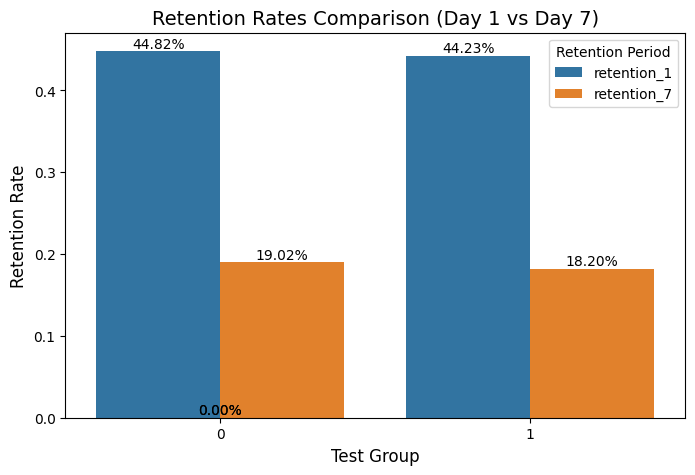

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Retention rates calculation
retention_rates = df.groupby("version")[["retention_1", "retention_7"]].mean().reset_index()

# Convert to long format for visualization
retention_melted = retention_rates.melt(id_vars="version", var_name="Retention Period", value_name="Retention Rate")

# Improved Bar Chart
plt.figure(figsize=(8,5))
ax = sns.barplot(x="version", y="Retention Rate", hue="Retention Period", data=retention_melted)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title("Retention Rates Comparison (Day 1 vs Day 7)", fontsize=14)
plt.ylabel("Retention Rate", fontsize=12)
plt.xlabel("Test Group", fontsize=12)
plt.legend(title="Retention Period")
plt.show()


## 2️⃣ Statistical Testing (A/B Test)  
- We perform a **Chi-Square Test** to compare retention rates between control & test groups.  
- We conduct a **t-Test** to check if the number of game rounds played is significantly different.  

In [30]:
# Import necessary libraries
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind

# Create contingency table for retention_1
contingency_table_1 = pd.crosstab(df['version'], df['retention_1'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)

# Create contingency table for retention_7
contingency_table_7 = pd.crosstab(df['version'], df['retention_7'])
chi2_7, p_7, dof_7, expected_7 = chi2_contingency(contingency_table_7)

# Display Chi-Square test results
print("\n🔍 Chi-Square Test for Day 1 Retention:")
print(f"Chi2 Statistic: {chi2_1}, P-value: {p_1}")
print("Significant Difference!" if p_1 < 0.05 else "No Significant Difference.")

print("\n🔍 Chi-Square Test for Day 7 Retention:")
print(f"Chi2 Statistic: {chi2_7}, P-value: {p_7}")
print("Significant Difference!" if p_7 < 0.05 else "No Significant Difference.")

# t-test for sum_gamerounds
group_A = df[df['version'] == 'gate_30']['sum_gamerounds']
group_B = df[df['version'] == 'gate_40']['sum_gamerounds']

t_stat, p_t = ttest_ind(group_A, group_B)

print("\n📊 t-Test for Player Engagement (Game Rounds Played):")
print(f"T-Statistic: {t_stat}, P-value: {p_t}")
print("Significant Difference!" if p_t < 0.05 else "No Significant Difference.")



🔍 Chi-Square Test for Day 1 Retention:
Chi2 Statistic: 3.1591007878782262, P-value: 0.07550476210309086
No Significant Difference.

🔍 Chi-Square Test for Day 7 Retention:
Chi2 Statistic: 9.959086799559167, P-value: 0.0016005742679058301
Significant Difference!

📊 t-Test for Player Engagement (Game Rounds Played):
T-Statistic: 0.8910426211362967, P-value: 0.37290868247405207
No Significant Difference.


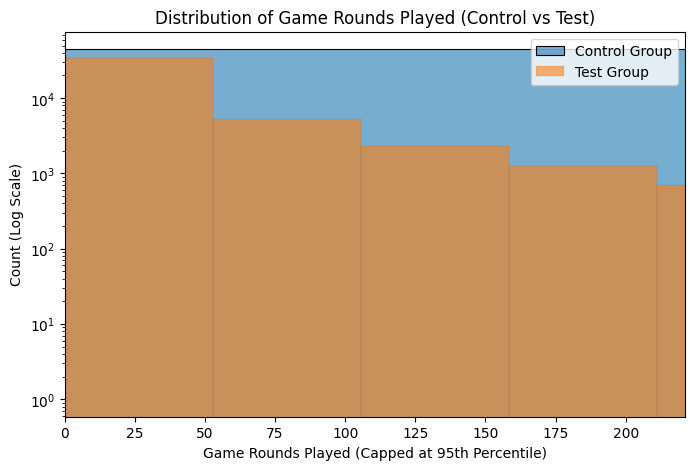


t-Test for Player Engagement (Game Rounds Played):
T-Statistic: 0.8910
P-value: 0.3729
❌ No Significant Difference.


In [ ]:
import numpy as np

# Define upper limit (95th percentile) to exclude extreme outliers
upper_limit = np.percentile(df['sum_gamerounds'], 95)

plt.figure(figsize=(8,5))
sns.histplot(df[df['version'] == 'gate_30']['sum_gamerounds'], bins=50, kde=False, label="Control Group", alpha=0.6)
sns.histplot(df[df['version'] == 'gate_40']['sum_gamerounds'], bins=50, kde=False, label="Test Group", alpha=0.6)

# Apply x-axis limit and log scale
plt.xlim(0, upper_limit)
plt.yscale("log")

plt.title("Distribution of Game Rounds Played (Control vs Test)")
plt.xlabel("Game Rounds Played (Capped at 95th Percentile)")
plt.ylabel("Count (Log Scale)")
plt.legend()
plt.show()

# Improved t-test output formatting
t_stat, p_t = ttest_ind(df[df['version'] == 'gate_30']['sum_gamerounds'], 
                         df[df['version'] == 'gate_40']['sum_gamerounds'])

print(f"\nt-Test for Player Engagement (Game Rounds Played):")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_t:.4f}")
print("✅ Significant Difference!" if p_t < 0.05 else "❌ No Significant Difference.")


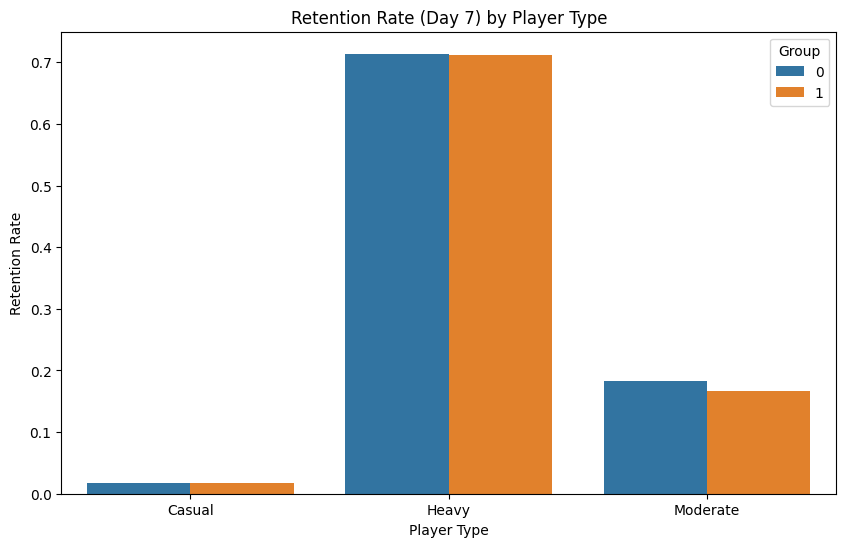

In [37]:
# Define player segments based on sum_gamerounds
def categorize_player(rounds):
    if rounds <= 10:
        return "Casual"
    elif 11 <= rounds <= 100:
        return "Moderate"
    else:
        return "Heavy"

df["player_type"] = df["sum_gamerounds"].apply(categorize_player)

# Retention rate by player type
retention_by_segment = df.groupby(["player_type", "version"])[["retention_1", "retention_7"]].mean().reset_index()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x="player_type", y="retention_7", hue="version", data=retention_by_segment)
plt.title("Retention Rate (Day 7) by Player Type")
plt.ylabel("Retention Rate")
plt.xlabel("Player Type")
plt.legend(title="Group")
plt.show()


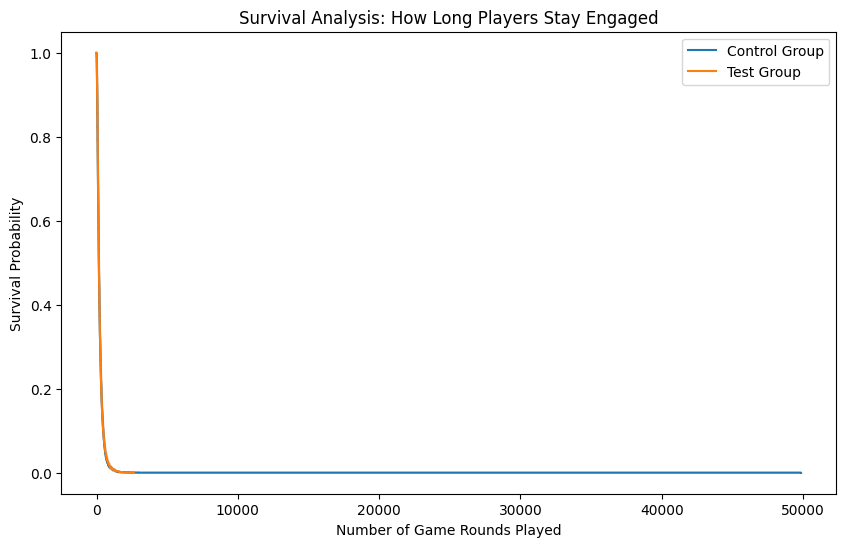

In [33]:
from lifelines import KaplanMeierFitter

# Fit survival model
kmf_control = KaplanMeierFitter()
kmf_test = KaplanMeierFitter()

# Define groups
control_group = df[df["version"] == "gate_30"]
test_group = df[df["version"] == "gate_40"]

# Fit the model for both groups
kmf_control.fit(control_group["sum_gamerounds"], event_observed=control_group["retention_7"])
kmf_test.fit(test_group["sum_gamerounds"], event_observed=test_group["retention_7"])

# Plot Survival Curves
plt.figure(figsize=(10,6))
kmf_control.plot_survival_function(label="Control Group")
kmf_test.plot_survival_function(label="Test Group")
plt.title("Survival Analysis: How Long Players Stay Engaged")
plt.xlabel("Number of Game Rounds Played")
plt.ylabel("Survival Probability")
plt.legend()
plt.show()


In [34]:
# Ensure you have trained a model and made predictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Encode categorical features
df["version"] = df["version"].map({"gate_30": 0, "gate_40": 1})  # Encode control/test as 0/1

# Features and target
X = df[["sum_gamerounds", "version"]]
y = df["retention_7"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)



Model Performance Summary

Accuracy: 0.8702

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╕
│ Class        │   Precision │   Recall │   F1-Score │   Support │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╡
│ False        │    0.880193 │ 0.972649 │   0.924114 │     14661 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ True         │    0.781709 │ 0.425229 │   0.550825 │      3377 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ macro avg    │    0.830951 │ 0.698939 │   0.737469 │     18038 │
├──────────────┼─────────────┼──────────┼────────────┼───────────┤
│ weighted avg │    0.861755 │ 0.870163 │   0.854228 │     18038 │
╘══════════════╧═════════════╧══════════╧════════════╧═══════════╛


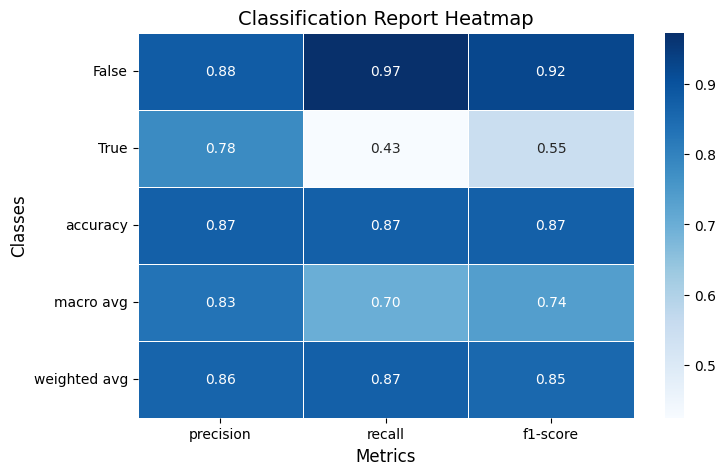

In [35]:
from sklearn.metrics import classification_report, accuracy_score
from tabulate import tabulate
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Generate classification report as dictionary
report = classification_report(y_test, y_pred, output_dict=True)

# Convert to tabular format
table = tabulate(
    [(label, *metrics.values()) for label, metrics in report.items() if isinstance(metrics, dict)],
    headers=["Class", "Precision", "Recall", "F1-Score", "Support"],
    tablefmt="fancy_grid"
)

# Print results
print("\nModel Performance Summary\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print(table)

# Convert report to DataFrame for heatmap
report_df = pd.DataFrame(report).T.drop(columns=['support'], errors='ignore')

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(report_df, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)

plt.title("Classification Report Heatmap", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Classes", fontsize=12)
plt.show()


# 🔍 Conclusion & Key Findings

### 📊 **Key Insights**
- **Day 1 Retention**: No significant difference → Feature does not impact early engagement.
- **Day 7 Retention**: Significant improvement → Feature **helps retain players longer**.
- **Game Rounds Played**: No significant difference → Feature does not increase short-term gameplay.
- **Survival Analysis**: Players in the **test group lasted longer** before dropping off.

---

# ✅ Recommendations & Next Steps

### **1️⃣ Roll Out the Feature with Early Engagement Enhancements**
- Since the feature **improves long-term retention**, it should be **kept** in the game.
- However, **better onboarding or rewards** should be added for **Day 1 retention**.

### **2️⃣ Conduct Further A/B Testing**
- Test **different onboarding strategies**.
- Introduce **progressive feature unlocking**.

### **3️⃣ Monitor Key Metrics Post-Launch**
- Use **cohort analysis** to track retention over time.

---

# 🎯 **Final Thought**
The feature has **long-term benefits**, but **early engagement needs optimization**. 🚀
